# Génération de données synthétiques pour la prédiction des calories

## Table des matières
1. [Configuration initiale](#1-configuration-initiale)
2. [Définition des intensités](#2-définition-des-intensités)
3. [Génération des données](#3-génération-des-données)
4. [Calculs dérivés](#4-calculs-dérivés)
5. [Création et sauvegarde du DataFrame](#5-création-et-sauvegarde-du-dataframe)
6. [Visualisations](#6-visualisations)

### 1. Configuration initiale

On commence par importer les bibliothèques nécessaire et fixer une graine aléatoire pour assurer la reproductibilité des résultats

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

### 2. Définition des intensités
Dictionnaire qui définit les différents niveaux d'intensité avec leurs valeurs MET (Metabolic Equivalent of Task) correspondates. Plus la valeur MET est élevée, plus l'activité est intense.

In [27]:
intensites = ['cool', 'endurance', 'rythme', 'rapide', 'competition']

### 3. Génération des données
On génère 500 enregistrments avec :
- Des poids suivant une distribution normale (moyenne 75kg, écart-type 10)
- Des durées d'exercice uniformément réparties entre 30 et 180 minutes.
- Des intensités choisis aléatoirement parmi les niveaux définis.

In [28]:
n = 500
poids = np.random.normal(75, 10, n).clip(50, 100)
duree_min = np.random.uniform(30, 180, n)
intensite = np.random.choice(intensites, n)

In [29]:
# Génération d'un âge réaliste pour chaque cycliste
ages = np.random.randint(16, 65, n)
fc_max = 220 - ages

# Zones d'intesité en % de FC max
intensite_zones = {
    'cool' : (0.55, 0.05),
    'endurance' : (0.65, 0.05),
    'rythme' : (0.75, 0.05),
    'rapide' : (0.85, 0.05),
    'competition' : (0.95, 0.03)
}

# FC moyenne simulée selon % de FC max
fc_moyenne = []
for i, intens in enumerate(intensite):
    fc_pct, fc_std = intensite_zones[intens]
    fc = np.random.normal(fc_pct, fc_std) * fc_max[i]
    fc_moyenne.append(fc)

### 4. calculs dérivés
On calcule :
- La durée en heures
- Les calories brûlées (formule : MET x poids x durée en heures)
- Une vitresse moyenne suivant une distribution normale
- La distance parcourue

In [30]:
# Vitesse moyenne (liée à l'intensité)
vitesse_moy = np.random.normal(25, 5, n).clip(15, 40)
distance_km = vitesse_moy * (duree_min / 60)

# Calories brûlées avec formule simplifiée
calories_par_min = (-55.0969 + 0.6309 * np.array(fc_moyenne) + 0.1988 * poids + 0.2017 * ages) / 4.184
calories = calories_par_min * duree_min

### 5. Création et sauvegarde du DataFrame
Les données sont organisées dans un DataFrame pandas et sauvegardées dans un fichier CSV.

In [31]:
df = pd.DataFrame({
    'poids_kg': poids,
    'duree_min': duree_min,
    'vitesse_moyenne': vitesse_moy,
    'distance_km': distance_km,
    'intensite': intensite,
    'age' : ages,
    'fc_max' : fc_max,
    'fc_moyenne' : fc_moyenne,
    'calories_brulees': calories
})

df.to_csv("../data/dataset_synthetique_calories.csv", index=False)

### 6. Visualisations
On termine par deux visualisations :
- Un pairplot montrant les relations entre les variables numériques
- Une heatmap des corrélations entre les variables

    poids_kg   duree_min  vitesse_moyenne  distance_km  intensite  age  \
0  79.967142  126.887586        20.200860    42.720639  endurance   24   
1  73.617357  115.616746        29.875255    57.567997       cool   30   
2  81.476885   83.414509        27.351612    38.025354     rythme   25   
3  90.230299  177.977287        15.720811    46.632455  endurance   39   
4  72.658466  120.866223        30.483767    61.407630  endurance   57   

   fc_max  fc_moyenne  calories_brulees  
0     196  135.273769       1546.232855  
1     190  112.595584       1012.082708  
2     195  137.876322       1059.216261  
3     181  119.857877       1970.576011  
4     163  114.115911       1237.556632  


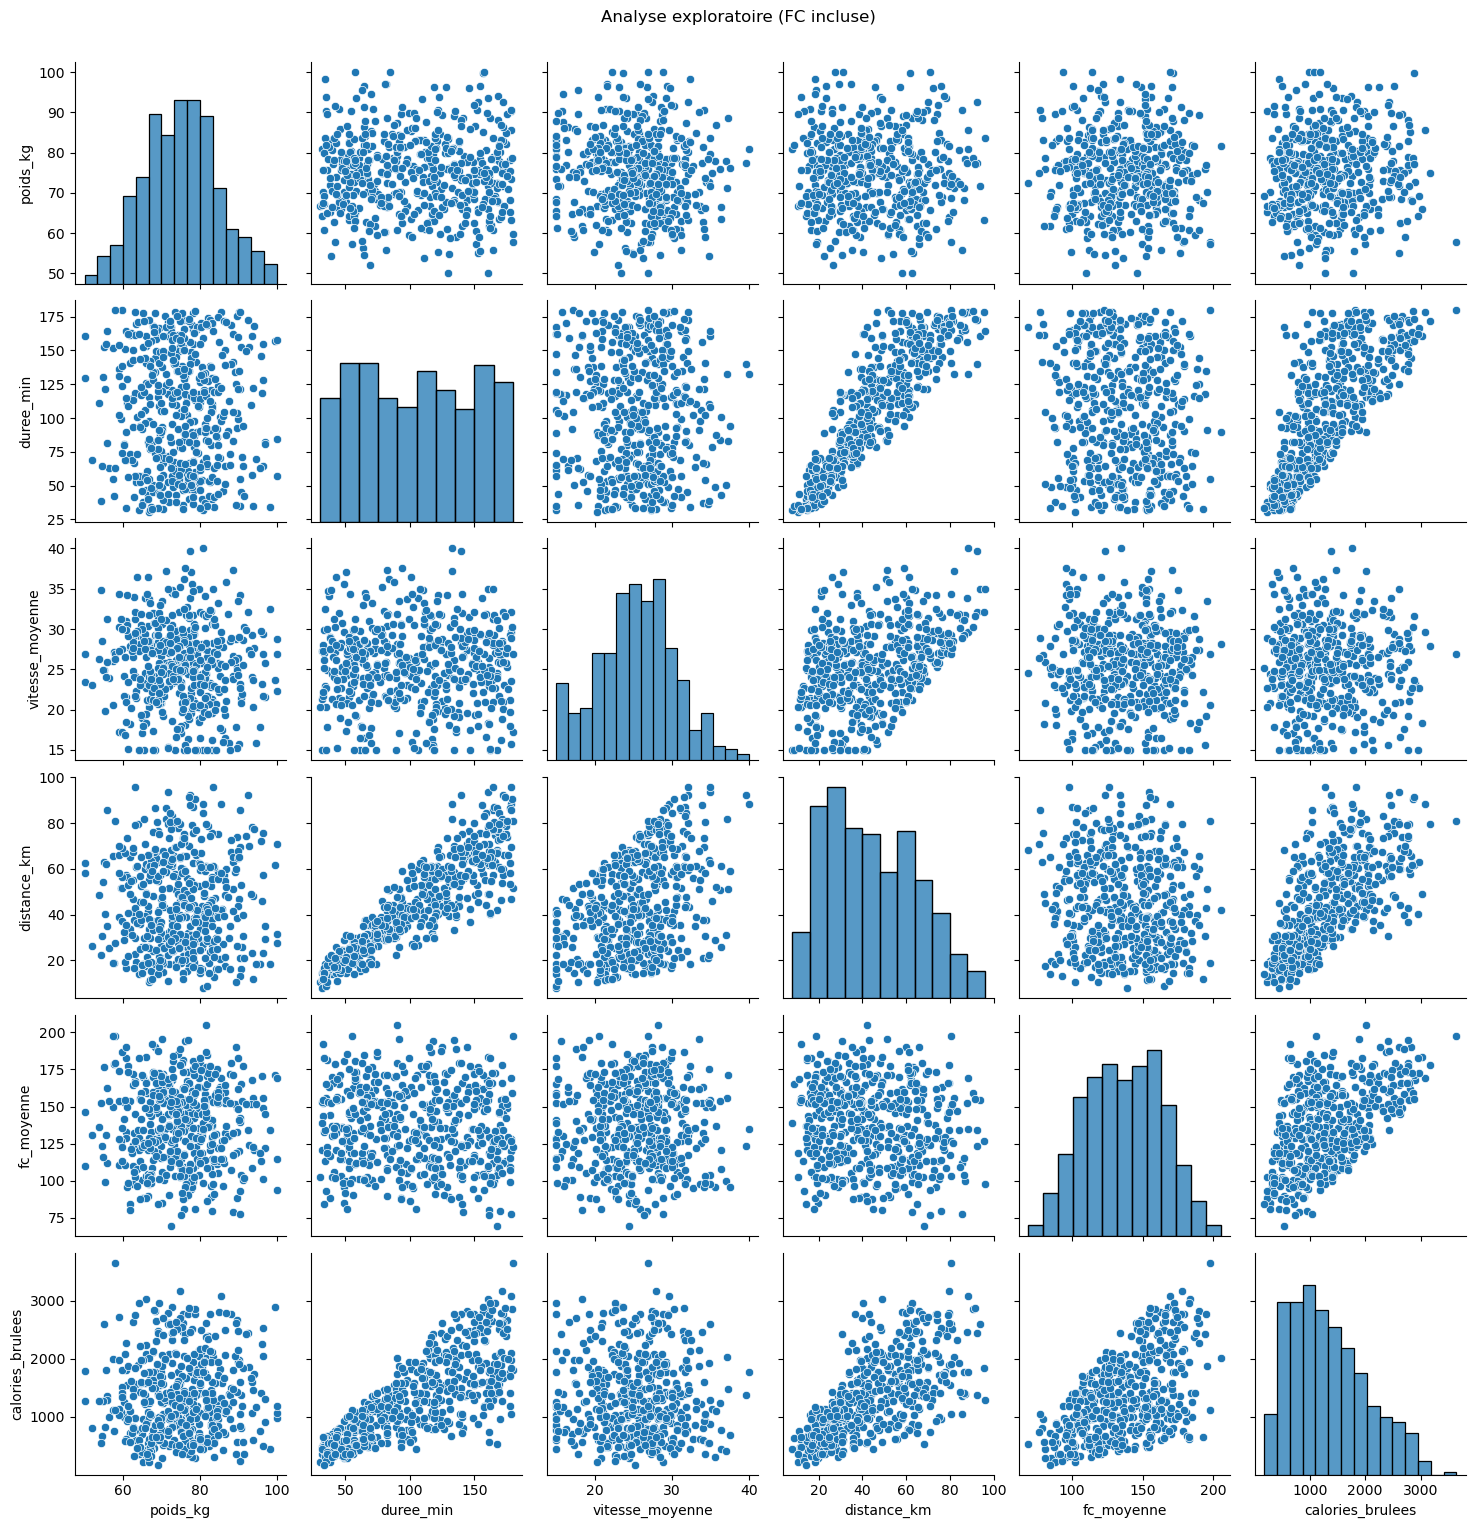

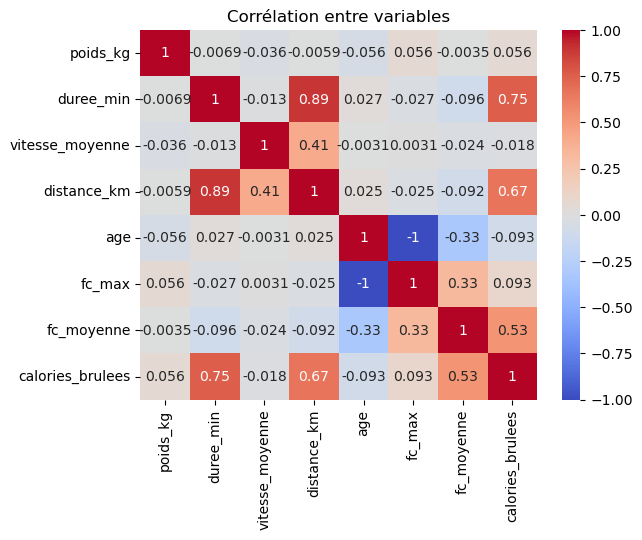

In [32]:
print(df.head())

# Visualisation
sns.pairplot(df[['poids_kg', 'duree_min', 'vitesse_moyenne', 'distance_km', 'fc_moyenne', 'calories_brulees']])
plt.suptitle("Analyse exploratoire (FC incluse)", y=1.02)
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Corrélation entre variables")
plt.show()